In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import seaborn as sns 
import matplotlib.pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
pulsar_stars = pd.read_csv("pulsar_stars.csv") 

Reading The Dataset from Drive

In [ ]:
print(pulsar_stars.apply(pd.Series.count))

 Mean of the integrated profile                  17898
 Standard deviation of the integrated profile    17898
 Excess kurtosis of the integrated profile       17898
 Skewness of the integrated profile              17898
 Mean of the DM-SNR curve                        17898
 Standard deviation of the DM-SNR curve          17898
 Excess kurtosis of the DM-SNR curve             17898
 Skewness of the DM-SNR curve                    17898
target_class                                     17898
dtype: int64


Creating Training Dataset

In [ ]:
import random

In [ ]:
random.seed(10) 
##The seed() method is used to initialize the random number generator.

In [ ]:
X = pulsar_stars.drop(['target_class'], axis = 1) 
##The drop() method removes the specified row or column.

In [ ]:
y = pulsar_stars['target_class'] 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.8, random_state = 10) 

In [ ]:
print(y_train)

964      0
5629     1
8679     0
6873     0
350      0
        ..
9372     0
7291     0
17728    0
7293     0
17673    0
Name: target_class, Length: 3579, dtype: int64


In [ ]:
X_columns = X_train.columns
X_columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')

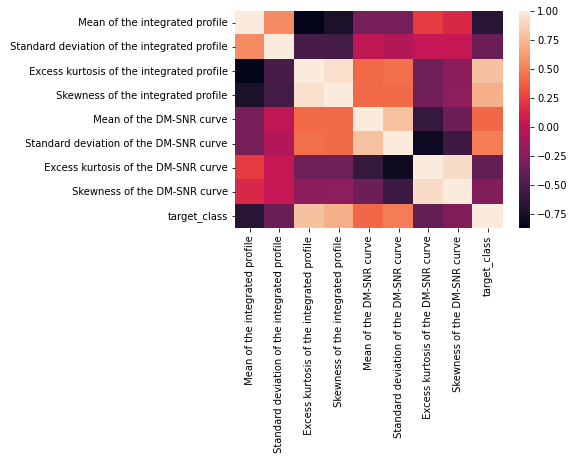

In [ ]:
corr = pulsar_stars.corr()
sns.heatmap(corr)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

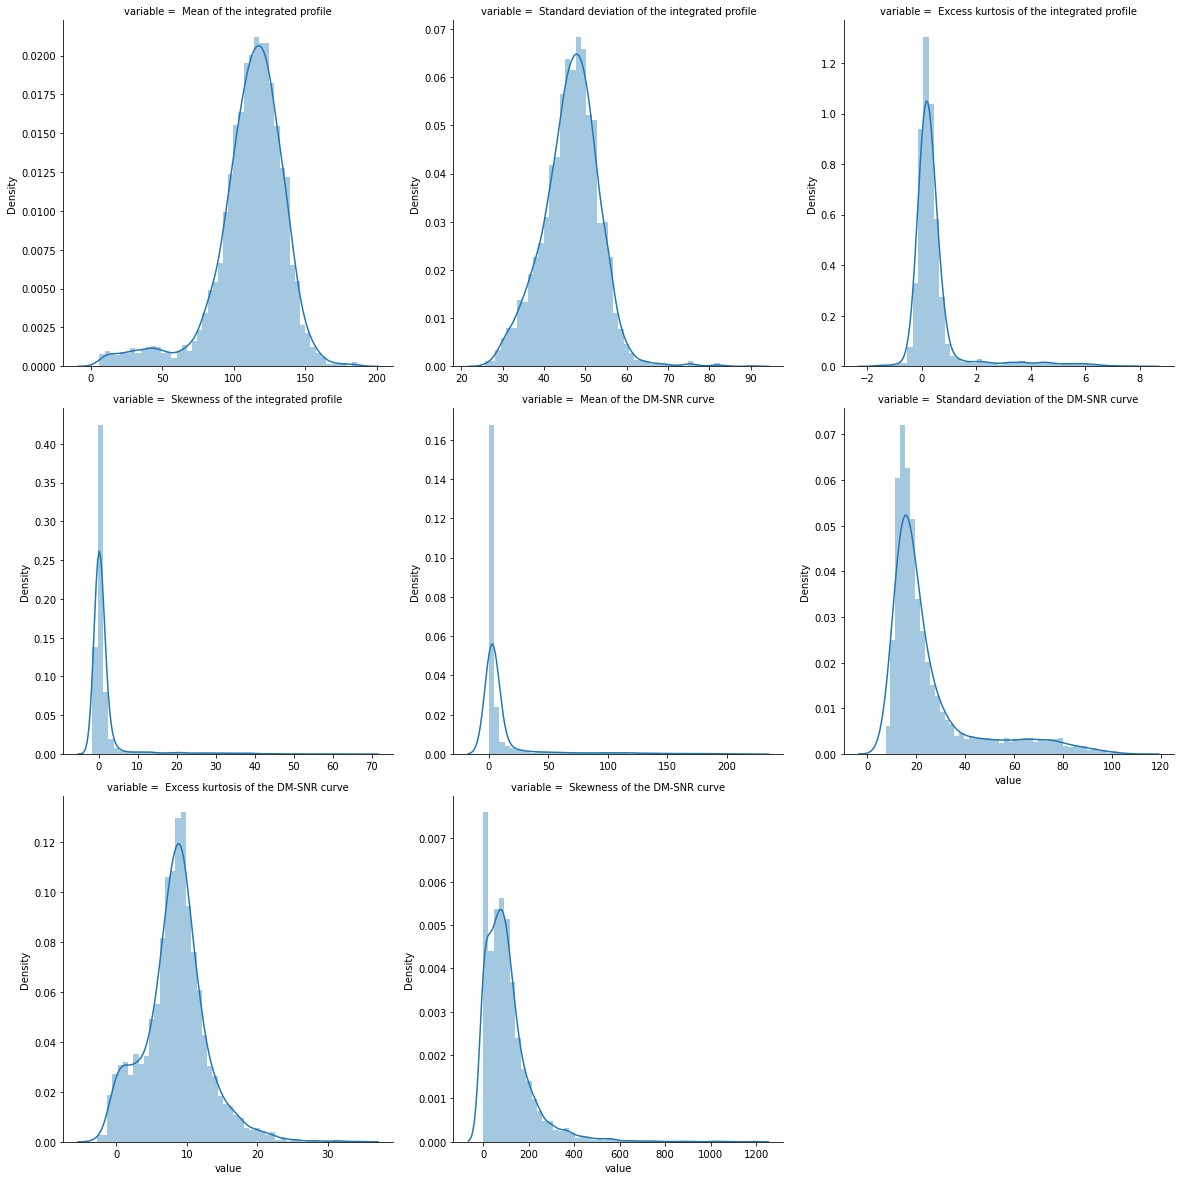

In [ ]:
#create numeric plots
num = [f for f in X_train.columns if X_train.dtypes[f] != 'object']
nd = pd.melt(X_train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=3, height = 5.5, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [ ]:
# DecisionTreeClassifier
dc = DecisionTreeClassifier(max_depth = 4)
dc.fit(X_train, y_train)

params = {'max_depth' : [2,4,8]}
dcgrid = GridSearchCV(estimator = dc, param_grid = params, cv = KFold(5, shuffle=True, random_state =10) , scoring = 'accuracy')
dcgrid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'max_depth': [2, 4, 8]}, scoring='accuracy')

In [ ]:
# Then LogisticRegression
lg = LogisticRegression(C=0.001, solver='liblinear')
lg.fit(X_train, y_train)

params = {'C':[0.01,0.1,1,10]}
lggrid = GridSearchCV(estimator = lg, param_grid = params, cv = KFold(5, shuffle = True, random_state = 10), scoring = 'accuracy')
lggrid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=LogisticRegression(C=0.001, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='accuracy')

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_depth = 10)
rf.fit(X_train, y_train)

params = {'n_estimators' : [10, 20, 50, 100], 'max_depth' : [10, 50]}
rfgrid = GridSearchCV(estimator = rf, param_grid = params, cv = KFold(5, shuffle = True, random_state = 10), scoring = 'accuracy')
rfgrid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(max_depth=10, n_estimators=10),
             param_grid={'max_depth': [10, 50],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
#KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 10, p = 2)
kn.fit(X_train, y_train)

params = {'n_neighbors' : [2, 5, 10, 50], 'weights' : ['uniform', 'distance'], 'p' :[1,2]}
kngrid = GridSearchCV(estimator = kn, param_grid = params, cv = KFold(5, shuffle = True, random_state = 10), scoring = 'accuracy')
kngrid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [2, 5, 10, 50], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# we define the best models 
dc_best = dcgrid.best_estimator_
lg_best = lggrid.best_estimator_
rf_best = rfgrid.best_estimator_
kn_best = kngrid.best_estimator_

In [ ]:
import time

In [ ]:
start = time.time()

dc = dc_best
dc_best.fit(X_train, y_train)

end = time.time()
print('time for Decision Tree Classifier = ', end - start, 's')
def performance_df(): performance_df['Decision_tree']['time(s)'] = end - start

# Then by LogisticRegression
start = time.time()

lg = lg_best
lg_best.fit(X_train, y_train)

end = time.time()
print('time for Logisitic Regression= ', end - start, 's')
def performance_df(): performance_df['Logistic_regression']['time(s)'] = end - start
# then by RandomForestClassifier
start = time.time()

rf = rf_best
rf_best.fit(X_train, y_train)

end = time.time()
print('time for Random Forst Classifier = ', end - start, 's')
def performance_df(): performance_df['Random_forest']['time(s)'] = end - start


# then KNeighborsClassifier
start = time.time()

kn = kn_best
kn_best.fit(X_train, y_train)

end = time.time()
print('time for K_Neighbors Classifier = ', end - start,'s')
def performance_df(): performance_df['K-NNeighbors']['time(s)'] = end - start

time for Decision Tree Classifier =  0.01802968978881836 s
time for Logisitic Regression=  0.015414237976074219 s
time for Random Forst Classifier =  0.0613863468170166 s
time for K_Neighbors Classifier =  0.0039827823638916016 s


In [ ]:
# we will calculate the scores of each model 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
y_predict_dc = dc_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_dc)
recall = recall_score(y_test, y_predict_dc)
def performance_df(): performance_df['Decision_tree']['accuracy'] = accuracy
def performance_df(): performance_df['Decision_tree']['recall'] = recall

y_predict_lg = lg_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_lg)
recall = recall_score(y_test, y_predict_lg)
def performance_df(): performance_df['Logistic_regression']['accuracy'] = accuracy
def performance_df(): performance_df['Logistic_regression']['recall'] = recall

y_predict_rf = dc_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_rf)
recall = recall_score(y_test, y_predict_rf)
def performance_df(): performance_df['Random_forest']['accuracy'] = accuracy
def performance_df(): performance_df['Random_forest']['recall'] = recall

y_predict_kn = dc_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_kn)
recall = recall_score(y_test, y_predict_kn)
def performance_df(): performance_df['K-NNeighbors']['accuracy'] = accuracy
def performance_df(): performance_df['K-NNeighbors']['recall'] = recall

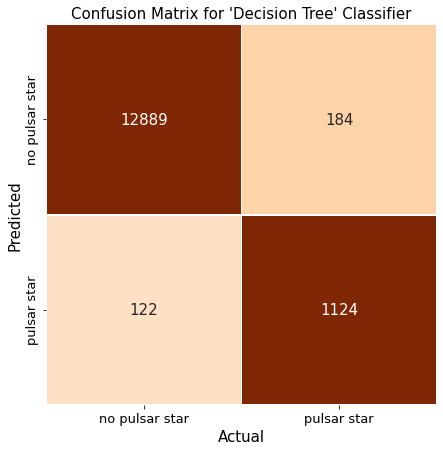


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13011
           1       0.90      0.86      0.88      1308

    accuracy                           0.98     14319
   macro avg       0.94      0.92      0.93     14319
weighted avg       0.98      0.98      0.98     14319



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_mat_dc = confusion_matrix(y_test, y_predict_dc)
conf_math_dc_df = pd.DataFrame(conf_mat_dc) 

fig, ax = plt.subplots(figsize = (7,7)) 
sns.heatmap(conf_math_dc_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"],yticklabels=["no pulsar star","pulsar star"])

plt.ylabel("Predicted", fontsize=15) 
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13) 
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13) 

plt.title("Confusion Matrix for 'Decision Tree' Classifier", fontsize=15)  

plt.show()
print("")
print(classification_report(y_test, y_predict_dc))

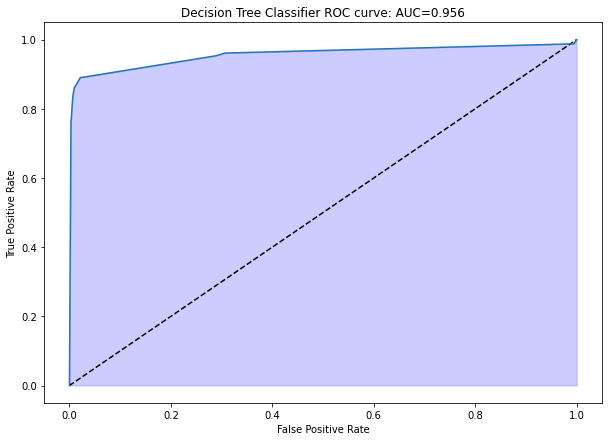

In [ ]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
dc_best_prob = dc_best.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, dc_best_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, dc_best_prob[:, 1])
plt.title('Decision Tree Classifier ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

def performance_df(): performance_df['Decision_tree']['AUC'] = AUC

In [ ]:
# thus the logistic regression is the best model : we will keep it 
# Now we want to see the importance of each feature on the result  
dataframe_importance = pd.DataFrame()
# columns = X_train.columns
columns = X_columns

importances = np.abs(lg_best.coef_[0])

for i in range(len(columns)):
    dataframe_importance[columns[i]] = [importances[i]]

dataframe_importance.insert(0, '', 'Importance features')
dataframe_importance.head(10)

,,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,Importance features,0.519119,0.002811,6.294142,2.779748,0.49189,1.072914,0.988323,1.197186
